In [1]:
# Decision Tree Model
# Import libraries
import numpy as np # For linear algebra
import pandas as pd # For data preparation and processing or data manipulation
import seaborn as sb # For statistical data visualization
import matplotlib.pyplot as plt # For plotting data visualization


In [2]:
# Load/ Read the data-set
diseases = pd.read_csv('heart_disease.csv')
diseases.head(20) # Displays the first 20 values

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [3]:
"""__summary
cp = chest pain
trestbp= resting blood pressure
chol = cholesterol
fbs=fasting blood sugar
restecg=resting elctrocardiography
exang = exercise induced again
oldpeak= ST depression induced
slope = the slope of peak exercise
ca = number of major vessel
thal = normal, texted defect, reversible defect
target = have disease or not (1=yes, 0=no)
"""
#Displays the data points and features in the dataset
print("Dimensions of heart diseases: {}".format(diseases.shape))

Dimensions of heart diseases: (1025, 14)


In [4]:
# Target Value counts
# Number of people with heart disease
# Column for target
diseases.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [5]:
diseases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
# Show percentage of male and female of those with heart disease
count_female = len(diseases[diseases.sex == 0])
count_male = len(diseases[diseases.sex == 1])

#Show the output
print('Percentage of female Patients: {:.2f}%'.format(count_female/len(diseases.sex)*100))
print('Percentage of male Patients: {:.2f}%'.format(count_male/len(diseases.sex)*100))

Percentage of female Patients: 30.44%
Percentage of male Patients: 69.56%


In [7]:
# Show the mean 
diseases.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


In [8]:
from sklearn.model_selection import train_test_split

# ML for Training and Testing the dataset
# Creating the testing and training sets
y = diseases.target.values # For making the other variables dependent
x_data = diseases.drop(['target'], axis=1) # Make 'target' variable only independent variable
# Split the data for training=79 and testing=21
X_train, X_test, y_train, y_test = train_test_split(diseases.loc[:, diseases.columns !='target'],diseases['target'], random_state=66)
# Check shape of the data remaining after splitting into training and testing
X_train.shape, X_test.shape

((768, 13), (257, 13))

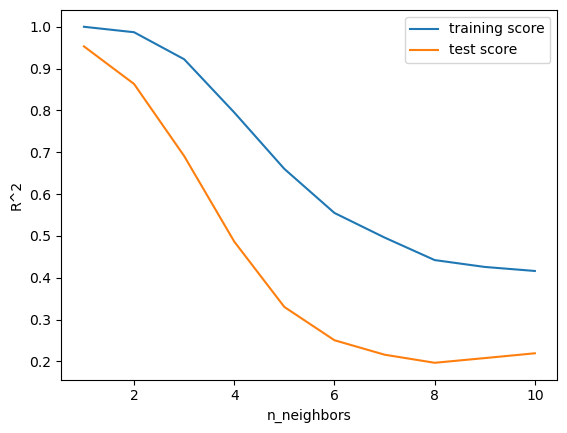

In [9]:
#Using the k-Nearest Neighbor Regression
from sklearn.neighbors import KNeighborsRegressor

training_score=[]
test_score=[]
#trying n_neighbors from 1 to 10
neighbors_settings= range(1, 11)

for n_neighbors in neighbors_settings:
    #model building
    
    knn=KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    
    #recording the training set score
    
    training_score.append(knn.score(X_train, y_train))
    
    #recording test set score
    
    test_score.append(knn.score(X_test, y_test))
    
#plot for comparison of results in test and train scores
plt.plot(neighbors_settings, training_score, label="training score")
plt.plot(neighbors_settings, test_score, label="test score")
plt.xlabel("n_neighbors")
plt.ylabel("R^2")

# add legend
plt.legend()
plt.savefig('knn_compare_model')
from sklearn.neighbors import KNeighborsRegressor


In [10]:
from sklearn.neighbors import KNeighborsRegressor

#kNN Model accuracy
knn= KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
k1=knn.score(X_train, y_train)
k2=knn.score(X_test, y_test)
print("R^2 of kNN Regressor on training set: {:.3f}".format(k1))
print("R^2 of kNN Regressor on test set: {:.3f}".format(k2))

R^2 of kNN Regressor on training set: 0.416
R^2 of kNN Regressor on test set: 0.220


In [11]:
#Using the decision tree regressor
diseases_features=[x for i, x in enumerate(diseases.columns) if i !=13]

from sklearn.tree import DecisionTreeRegressor

tree= DecisionTreeRegressor(random_state=0)
tree.fit(X_train, y_train)
t_1= tree.score(X_train, y_train)
t_2= tree.score(X_test, y_test)
print("R^2 of Decision Tree Regressor on training set: {:.3f}".format(t_1))
print("R^2 of Decision Tree Regressor on test set: {:.3f}".format(t_2))
#Results obtained due to overfitting and poor generalization to new data

R^2 of Decision Tree Regressor on training set: 1.000
R^2 of Decision Tree Regressor on test set: 0.953


In [12]:
#Decision tree regressor after applying pre-pruning and setting a traversal depth limit 

tree_1= DecisionTreeRegressor(max_depth=8, random_state=1)
tree_1.fit(X_train, y_train)
t_3= tree_1.score(X_train, y_train)
t_4= tree_1.score(X_test, y_test)
print("R^2 of Decision Tree Regressor on training set: {:.3f}".format(t_3))
print("R^2 of Decision Tree Regressor on test set: {:.3f}".format(t_4))


R^2 of Decision Tree Regressor on training set: 0.973
R^2 of Decision Tree Regressor on test set: 0.983


In [13]:
#Decision tree regressor feature importance
print("Feature importance: \n{}".format(tree_1.feature_importances_))

Feature importance: 
[0.05124149 0.02738473 0.31972904 0.05623195 0.10872478 0.
 0.02275477 0.0630141  0.02174844 0.07663028 0.03284641 0.09190581
 0.12778819]


In [14]:
#Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor(n_estimators=100, random_state=1)#Random Forest Regressor of 100 trees
rf.fit(X_train, y_train)
r_1= rf.score(X_train, y_train)
r_2= rf.score(X_test, y_test)
print("R^2 of Random Forest Regressor on training set: {:.3f}".format(r_1))
print("R^2 of Random Forest Regressor on test set: {:.3f}".format(r_2))

R^2 of Random Forest Regressor on training set: 0.993
R^2 of Random Forest Regressor on test set: 0.963


In [15]:
#Random Forest Regressor pre-pruning by increasing the max_depth

rf_1= RandomForestRegressor(max_depth= 7, n_estimators=100, random_state=42)#Random Forest Regressor of 100 trees with a maximum depth of 7
rf_1.fit(X_train, y_train)
r_3= rf_1.score(X_train, y_train)
r_4= rf_1.score(X_test, y_test)
print("R^2 of Random Forest Regressor on training set after pre-pruning: {:.3f}".format(r_3))
print("R^2 of Random Forest Regressor on test set after pre-pruning: {:.3f}".format(r_4))

R^2 of Random Forest Regressor on training set after pre-pruning: 0.971
R^2 of Random Forest Regressor on test set after pre-pruning: 0.926


In [16]:
#Random Forest Regressor feature importance
print("Feature importance: \n{}".format(rf_1.feature_importances_))

Feature importance: 
[0.07996491 0.03118698 0.3073811  0.05777433 0.07923892 0.00445618
 0.01204279 0.08153577 0.01820674 0.09620885 0.02386177 0.1027328
 0.10540886]


In [17]:
#Support Vector Regressor or Machine before rescaling the features

from sklearn.svm import SVR

svr= SVR()
svr.fit(X_train, y_train)
s_1= svr.score(X_train, y_train)
s_2= svr.score(X_test, y_test)
print("R^2 of Support Vector Machine on training set: {:.3f}".format(s_1))
print("R^2 of Support Vector Machine on test set: {:.3f}".format(s_2))

R^2 of Support Vector Machine on training set: 0.194
R^2 of Support Vector Machine on test set: 0.195


In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()#scaling the train and test sets using the minmax scaler
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

svr_1= SVR()
svr_1.fit(X_train_scaled, y_train)
s3= svr_1.score(X_train_scaled, y_train)
s4= svr_1.score(X_test_scaled, y_test)
print("R^2 of Support Vector Machine on training set: {:.3f}".format(s3))
print("R^2 of Support Vector Machine on test set: {:.3f}".format(s4))

R^2 of Support Vector Machine on training set: 0.785
R^2 of Support Vector Machine on test set: 0.718


In [19]:
#Using gamma to fit model
svr_2= SVR(gamma=10)
svr_2.fit(X_train_scaled, y_train)
s5= svr_2.score(X_train_scaled, y_train)
s6= svr_2.score(X_test_scaled, y_test)
print("R^2 of Support Vector Machine on training set: {:.3f}".format(s5))
print("R^2 of Support Vector Machine on test set: {:.3f}".format(s6))

R^2 of Support Vector Machine on training set: 0.961
R^2 of Support Vector Machine on test set: 0.784


In [20]:
#Using logistic regression 
from sklearn.linear_model import LogisticRegression

log_reg= LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)
log1=log_reg.score(X_train, y_train)
log2=log_reg.score(X_test, y_test)
print("R^2 of logistic regression  on training set: {:.3f}".format(log1))
print("R^2 of logistic regression  on test set: {:.3f}".format(log2))

R^2 of logistic regression  on training set: 0.872
R^2 of logistic regression  on test set: 0.837


C:\Users\DRAGO\dragoconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
#Using Naive Bayes

from sklearn.naive_bayes import GaussianNB

GNB= GaussianNB()
GNB.fit(X_train, y_train)
g1=GNB.score(X_train, y_train)
g2=GNB.score(X_test, y_test)
print("R^2 of Naive Bayes  on training set: {:.3f}".format(g1))
print("R^2 of Naive Bayes  on test set: {:.3f}".format(g2))

R^2 of Naive Bayes  on training set: 0.823
R^2 of Naive Bayes  on test set: 0.840


In [22]:
#Model evaluation
models=['KNN', 'Decison Tree Regressor', 'Random Forest Regressor', 'Support Vector Machine', 
        'Logistic Regression', 'Naive Bayes']

test_scores=[k2, t_4, r_2, s6, log2, g2]

compare_models=pd.DataFrame({
    "Algorithms": models, "Test Scores": test_scores
    })

compare_models.sort_values(by="Test Scores", ascending=False)

,Algorithms,Test Scores
1,Decison Tree Regressor,0.983407
2,Random Forest Regressor,0.963009
5,Naive Bayes,0.840467
4,Logistic Regression,0.836576
3,Support Vector Machine,0.784241
0,KNN,0.219598


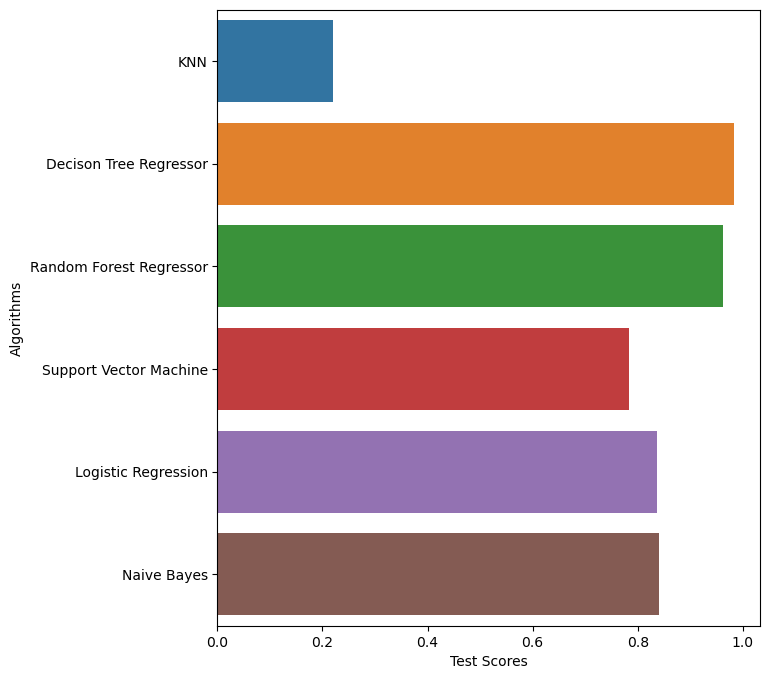

In [23]:
#Comparing the various model performances
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(7,8))
sb.barplot(x="Test Scores", y="Algorithms", data=compare_models)
plt.show()